In [1]:
import tensorflow
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import numpy as np
from tqdm import tqdm
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
import itertools
from tensorflow.keras.callbacks import EarlyStopping

# Data exploration

In [2]:
class_map = {
    'ApplyEyeMakeup': 1,
    'ApplyLipstick': 1,
    'Basketball': 2,
    'BasketballDunk': 2,
    'CricketBowling': 3,
    'CricketShot': 3,
    'PlayingCello': 4,
    'PlayingDaf': 4,
    'PlayingDhol': 4,
    'PlayingFlute': 4,
    'PlayingGuitar': 4,
    'PlayingPiano': 4,
    'PlayingSitar': 4,
    'PlayingTabla': 4,
    'PlayingViolin': 4,
    'FieldHockeyPenalty' : 5,
    'FloorGymnastics' : 6,
    'IceDancing' : 7,
    'JavelinThrow' : 8,
    'LongJump' : 21,
    'PullUps' : 9,
    'PushUps' : 10,
    'Rafting' : 11,
    'SalsaSpin' : 12,
    'Shotput' : 13,
    'SkateBoarding' : 14,
    'SkyDiving' : 15,
    'SoccerJuggling' : 16,
    'SoccerPenalty' : 17,
    'SumoWrestling' : 18,
    'WalkingWithDog' : 19,
    'WritingOnBoard' : 20
}

In [3]:
label_map = {
    'ApplyMakeUp': 1,
    'Basketball': 2,
    'PlayingCricket': 3,
    'PlayingMusicalInstrument': 4,
    'FieldHockeyPenalty' : 5,
    'FloorGymnastics' : 6,
    'IceDancing' : 7,
    'JavelinThrow' : 8,
    'LongJump' : 21,
    'PullUps' : 9,
    'PushUps' : 10,
    'Rafting' : 11,
    'SalsaSpin' : 12,
    'Shotput' : 13,
    'SkateBoarding' : 14,
    'SkyDiving' : 15,
    'SoccerJuggling' : 16,
    'SoccerPenalty' : 17,
    'SumoWrestling' : 18,
    'WalkingWithDog' : 19,
    'WritingOnBoard' : 20
}

In [4]:
# Sort the dictionary by values in ascending order
sorted_label_map = dict(sorted(label_map.items(), key=lambda item: item[1]))

# Print the sorted dictionary 
print(sorted_label_map)

{'ApplyMakeUp': 1, 'Basketball': 2, 'PlayingCricket': 3, 'PlayingMusicalInstrument': 4, 'FieldHockeyPenalty': 5, 'FloorGymnastics': 6, 'IceDancing': 7, 'JavelinThrow': 8, 'PullUps': 9, 'PushUps': 10, 'Rafting': 11, 'SalsaSpin': 12, 'Shotput': 13, 'SkateBoarding': 14, 'SkyDiving': 15, 'SoccerJuggling': 16, 'SoccerPenalty': 17, 'SumoWrestling': 18, 'WalkingWithDog': 19, 'WritingOnBoard': 20, 'LongJump': 21}


## I have already done the preprocessing for train/test split text files and uploaded those modified text files to "kaggle/input/split_files/", so that we don't have to rum those cell again and again

# Finalizing training and validation set : 01

In [5]:
# For train set
train_video_path_1 = []
train_labels_1 = []

with open("/kaggle/input/project-data/new_train_list_1.txt", "r") as file:
  for line in file:

    path,label = line.strip().split(" ")
    train_video_path_1.append(path)
    train_labels_1.append(label)

train_video_path_1 = np.array(train_video_path_1)    


# For test set
test_video_path_1 = []
test_labels_1 = []

with open("/kaggle/input/project-data/new_test_list_1.txt", "r") as file:
  for line in file:
    path,label = line.strip().split(" ")
    test_video_path_1.append(path)
    test_labels_1.append(label)

test_video_path_1 = np.array(test_video_path_1)    


# One hot encoding of the labels

one_hot_1 = pd.get_dummies(train_labels_1)
train_label_onehot_1 = np.array(one_hot_1)

one_hot_1 = pd.get_dummies(test_labels_1)
test_label_onehot_1 = np.array(one_hot_1)

# Finalizing training and validation set : 02

In [6]:
# For train set
train_video_path_2 = []
train_labels_2 = []

with open("/kaggle/input/project-data/new_train_list_2.txt", "r") as file:
  for line in file:

    path,label = line.strip().split(" ")
    train_video_path_2.append(path)
    train_labels_2.append(label)

train_video_path_2 = np.array(train_video_path_2)    


# For test set
test_video_path_2 = []
test_labels_2 = []

with open("/kaggle/input/project-data/new_test_list_2.txt", "r") as file:
  for line in file:
    path,label = line.strip().split(" ")
    test_video_path_2.append(path)
    test_labels_2.append(label)

test_video_path_2 = np.array(test_video_path_2)    


# One hot encoding of the labels

one_hot_2 = pd.get_dummies(train_labels_2)
train_label_onehot_2 = np.array(one_hot_2)

one_hot_2 = pd.get_dummies(test_labels_2)
test_label_onehot_2 = np.array(one_hot_2)

# Finalizing training and validation set : 03

In [7]:
# For train set
train_video_path_3 = []
train_labels_3 = []

with open("/kaggle/input/project-data/new_train_list_3.txt", "r") as file:
  for line in file:

    path,label = line.strip().split(" ")
    train_video_path_3.append(path)
    train_labels_3.append(label)

train_video_path_3 = np.array(train_video_path_3)    


# For test set
test_video_path_3 = []
test_labels_3 = []

with open("/kaggle/input/project-data/new_test_list_3.txt", "r") as file:
  for line in file:
    path,label = line.strip().split(" ")
    test_video_path_3.append(path)
    test_labels_3.append(label)

test_video_path_3 = np.array(test_video_path_3)    


# One hot encoding of the labels

one_hot_3 = pd.get_dummies(train_labels_3)
train_label_onehot_3 = np.array(one_hot_3)

one_hot_3 = pd.get_dummies(test_labels_3)
test_label_onehot_3 = np.array(one_hot_3)

# Exploratory data analysis

## DISTRIBUTION OF ACTION CATEGORIES

In [8]:
class_names = list(set(label_map.values()))

train_labels_1 = [int(label) for label in train_labels_1]
train_labels_1_arr = np.array(train_labels_1)

unique_labels_train = np.unique(train_labels_1_arr)

#print(unique_labels_train)

train_labels_1 = [int(label) for label in train_labels_1]
train_labels_1_arr = np.array(train_labels_1)

unique_labels_train = np.unique(train_labels_1_arr)

#print(unique_labels_train)

## ANALYSIS OF FPS

In [10]:
train_test_path_1 = np.append(train_video_path_1, test_video_path_1)

In [11]:
primary_path = '/kaggle/input/ucf101/UCF101/UCF-101/'
FPS_list_1 = []  
frame_count_1 = []

for path in train_test_path_1:
    video_path = os.path.join(primary_path, path)
    video_capture = cv2.VideoCapture(video_path)
    frames_video = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
    video_fps = video_capture.get(cv2.CAP_PROP_FPS)
    FPS_list_1.append(video_fps)
    frame_count_1.append(frames_video)

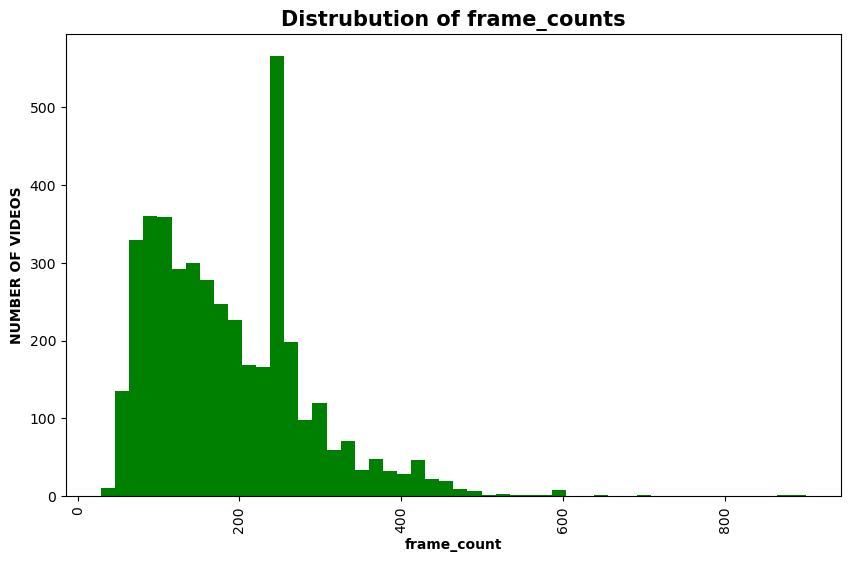

<Figure size 640x480 with 0 Axes>

In [12]:
#Distribution of frame_counts

import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.hist(frame_count_1,bins=50,color='green')
plt.xticks(rotation=90)
plt.xlabel('frame_count', fontweight='bold')
plt.ylabel('NUMBER OF VIDEOS', fontweight='bold')
plt.title('Distrubution of frame_counts', size=15, fontweight='bold')
plt.show()

plt.savefig('Distrubution of frame_counts.png')

In [13]:
frame_count_mean_1 = np.mean(frame_count_1)
print("Mean of the frame counts of train and test set of set 1 is: ", frame_count_mean_1)

Mean of the frame counts of train and test set of set 1 is:  187.67121675688398


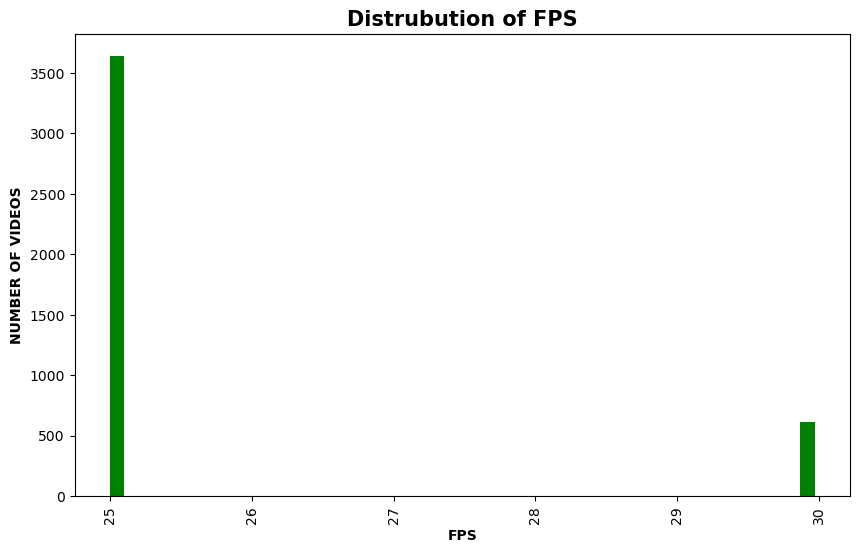

<Figure size 640x480 with 0 Axes>

In [14]:
#Distribution of FPS

import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.hist(FPS_list_1,bins=50,color='green')
plt.xticks(rotation=90)
plt.xlabel('FPS', fontweight='bold')
plt.ylabel('NUMBER OF VIDEOS', fontweight='bold')
plt.title('Distrubution of FPS', size=15, fontweight='bold')
plt.show()

plt.savefig('Distrubution of FPS.png')

In [15]:
# we have only two unique values of fps: 
fps_unique_1 = np.unique(FPS_list_1)
print("Unique values of FPS are as follows: \n",fps_unique_1)

Unique values of FPS are as follows: 
 [25.         29.97002997]


# MODELS:

## 1. SimpleRNN

In [16]:
def normalize_frame(frame):
    # Convert frame to numpy array
    frame_array = np.array(frame)
    
    # Convert data type to float32
    frame_array = frame_array.astype(np.float32)
    
    # Scale pixel values to be between 0 and 1
    frame_array /= 255.0
    
    # Subtract mean pixel value
    #mean_pixel = np.mean(frame_array)
    #frame_array -= mean_pixel
    
    # Divide by standard deviation
    #std_pixel = np.std(frame_array)
    #frame_array /= std_pixel
    
    return frame_array

In [17]:
## Data generatord

import os 
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

def video_data_generator_simpleRNN(video_paths, labels, batch_size, num_classes, num_frames, frame_size, vgg):
    while True:
        
        frame_dim_height, frame_dim_width = frame_size            #storing the height and weight of the frame given by the user
        
        # Shuffle the video paths and labels
        indices = np.arange(len(video_paths))
        np.random.shuffle(indices)
        video_paths = [video_paths[i] for i in indices]
        labels = [labels[i] for i in indices]

        folder_path = '/kaggle/input/ucf101/UCF101/UCF-101/'

        # Loop through the video paths in batches
        for i in range(0, len(video_paths), batch_size):
            #print("\n", i)
            # Load the video frames and resize them to frame_size
            video_batch = []
            for path in video_paths[i:i+batch_size]:
                video_path = os.path.join(folder_path, path)
                video_frames = []
                #video_features = []
                video_capture = cv2.VideoCapture(video_path)
                num_frames_video = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
                step = num_frames_video // num_frames
                for j in range(num_frames_video):
                    ret, frame = video_capture.read()
                    if not ret:
                        break
                    if (j % step == 0) and (len(video_frames) < num_frames):
                                #print("\n", j)
                                #print("\nBefore resizing: ",frame)
                                frame_resized = cv2.resize(frame, frame_size)
                                #frame_resized = normalize_frame(frame_resized)
                                #print("\nAfter resizing", frames_resized)
                                #print("\nFrame shape is: ",frame_resized.shape)
                                #features_frame = vgg.predict(frame_resized)
                                video_frames.append(frame_resized)
                                #video_features = np.vstack((video_features, features_frame))
                                #print("\nvideo features shape is: ",video_features.shape)
                video_capture.release()
                while len(video_frames) < num_frames:
                    video_frames.append(np.zeros((frame_dim,frame_dim,3)))

                if (np.array(video_frames)).shape != (num_frames, frame_dim, frame_dim, 3):
                     break
                
                video_frames = np.array(video_frames)
                #video_features = np.array(video_features)
                # Preprocess the frames using VGG16 preprocess_input function
                #video_frames = preprocess_input(video_frames)
                # Extract features using VGG16 model
                #print("\nVideo_frames has size: ", video_frames.shape)
                video_features = vgg.predict(video_frames, verbose=0)
                #print("\nVideo_features has size: ", video_features.shape)
                video_features= video_features.reshape(num_frames,7*7*512)
                video_batch.append(video_features)
            labels_batch = np.array(labels[i:i+batch_size])
            video_batch = np.array(video_batch)
            #print("\nVideo_batch shape is: ", video_batch.shape)
            #print("\nlabels_batch shape is: ", labels_batch.shape)
            
            # Yield the data batch
            yield video_batch, labels_batch

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 24, 24)            602712    
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 21)                12117     
                                                                 
Total params: 614,829
Trainable params: 614,829
Non-trainable params: 0
_________________________________________________________________


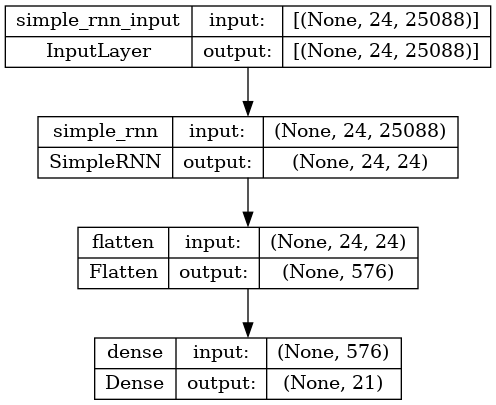

In [18]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout


batch_size = 5
num_classes = 21
num_frames = 24
frame_dim = 224
frame_size = (frame_dim, frame_dim)


# Define the VGG16 model to extract features from video frames
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))


model_rnn = Sequential()

model_rnn.add(SimpleRNN(num_frames, activation='relu', return_sequences=True, input_shape=(num_frames, 7*7*512)))
#model_rnn.add(BatchNormalization())
#model_rnn.add(SimpleRNN(num_frames, activation='relu', return_sequences=True))
#model_rnn.add(BatchNormalization())
#model_rnn.add(SimpleRNN(num_frames, activation='relu'))
#model_rnn.add(BatchNormalization())
model_rnn.add(Flatten())
model_rnn.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model_rnn.summary()

# Print the model structure
from tensorflow.keras.utils import plot_model
plot_model(model_rnn, to_file='model_simplernn.png', show_shapes=True, show_layer_names=True)

In [ ]:
# checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
#     filepath='/kaggle/working/MODEL_WEIGHTS/simpleRNN_weights.h5', # path to save the weights
#     monitor='val_accuracy', # criterion to monitor
#     save_best_only=True, # save only the best weights based on the criterion
#     mode='max' # monitoring criterion is to be maximized
# )

# Train the LSTM model using the video data generator function
train_gen = video_data_generator_simpleRNN(train_video_path_3, train_label_onehot_3, batch_size, num_classes, num_frames, frame_size, vgg)
val_gen = video_data_generator_simpleRNN(test_video_path_3, test_label_onehot_3, batch_size, num_classes, num_frames, frame_size, vgg)

model_rnn.fit(train_gen, steps_per_epoch=len(train_video_path_3)//batch_size, epochs=15, validation_data=val_gen, validation_steps=len(test_video_path_3)//batch_size)

Epoch 1/15
612/612 [==============================] - 1491s 2s/step - loss: 2.9962 - accuracy: 0.2781 - val_loss: 2.5312 - val_accuracy: 0.3036
Epoch 2/15
382/612 [=================>............] - ETA: 4:39 - loss: 2.4653 - accuracy: 0.2979

## 1. ConvLSTM2D

In [ ]:
## Data generatord

import os 
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

def video_data_generator_ConvLSTM2D(video_paths, labels, batch_size, num_classes, num_frames, frame_size):
    while True:
        
        frame_dim_height, frame_dim_width = frame_size            #storing the height and weight of the frame given by the user
        frame_dim = frame_dim_height
        # Shuffle the video paths and labels
        indices = np.arange(len(video_paths))
        np.random.shuffle(indices)
        video_paths = [video_paths[i] for i in indices]
        labels = [labels[i] for i in indices]

        folder_path = '/kaggle/input/ucf101/UCF101/UCF-101/'

        # Loop through the video paths in batches
        for i in range(0, len(video_paths), batch_size):
            #print("\n", i)
            # Load the video frames and resize them to frame_size
            video_batch = []
            for path in video_paths[i:i+batch_size]:
                video_path = os.path.join(folder_path, path)
                video_frames = []
                #video_features = []
                video_capture = cv2.VideoCapture(video_path)
                num_frames_video = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
                step = num_frames_video // num_frames
                for j in range(num_frames_video):
                    ret, frame = video_capture.read()
                    if not ret:
                        break
                    if (j % step == 0) and (len(video_frames) < num_frames):
                                #print("\n", j)
                                #print("\nBefore resizing: ",frame)
                                frame_resized = cv2.resize(frame, frame_size)
                                #print("\nAfter resizing", frames_resized)
                                #print("\nFrame shape is: ",frame_resized.shape)
                                #features_frame = vgg.predict(frame_resized)
                                video_frames.append(frame_resized)
                                #video_features = np.vstack((video_features, features_frame))
                                #print("\nvideo features shape is: ",video_features.shape)
                video_capture.release()
                while len(video_frames) < num_frames:
                    video_frames.append(np.zeros((frame_dim,frame_dim,3)))

                if (np.array(video_frames)).shape != (num_frames, frame_dim, frame_dim, 3):
                     break
                
                video_frames = np.array(video_frames)
                #video_features = np.array(video_features)
                # Preprocess the frames using VGG16 preprocess_input function
                #video_frames = preprocess_input(video_frames)
                # Extract features using VGG16 model
                #print("\nVideo_frames has size: ", video_frames.shape)
                #video_features = vgg.predict(video_frames, verbose=0)
                #print("\nVideo_features has size: ", video_features.shape)
                #video_features_reshaped = video_features.reshape(num_frames,7*7*512)
                video_batch.append(video_frames)
            labels_batch = np.array(labels[i:i+batch_size])
            video_batch = np.array(video_batch)
            #print("\nVideo_batch shape is: ", video_batch.shape)
            #print("\nlabels_batch shape is: ", labels_batch.shape)
            
            # Yield the data batch
            yield video_batch, labels_batch

In [ ]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout


batch_size = 5
num_classes = 21
num_frames = 24
frame_dim = 200
frame_size = (frame_dim, frame_dim)




model_convlstm2d = Sequential()
model_convlstm2d.add(ConvLSTM2D(filters=8, kernel_size=(3, 3), input_shape=(num_frames, frame_dim, frame_dim, 3), padding='same', return_sequences=True))
#model_convlstm2d.add(BatchNormalization())

#model_convlstm2d.add(ConvLSTM2D(filters=128, kernel_size=(3, 3), padding='same', return_sequences=True))
#model_convlstm2d.add(BatchNormalization())

#model_convlstm2d.add(ConvLSTM2D(filters=256, kernel_size=(3, 3), padding='same', return_sequences=True))
#model_convlstm2d.add(BatchNormalization())

#model_convlstm2d.add(ConvLSTM2D(filters=512, kernel_size=(3, 3), padding='same', return_sequences=True))
#model_convlstm2d.add(BatchNormalization())

#model_convlstm2d.add(ConvLSTM2D(filters=256, kernel_size=(3, 3), padding='same', return_sequences=True))

model_convlstm2d.add(Flatten())
model_convlstm2d.add(Dense(num_classes, activation='softmax'))  #input shape is none in the case of memory

# Compile the model
model_convlstm2d.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model_convlstm2d.summary()

# Print the model structure
from tensorflow.keras.utils import plot_model
plot_model(model_convlstm2d, to_file='model_convlstm2d.png', show_shapes=True, show_layer_names=True)

#in the case of the memory constraints if the gpu is not allowing to allocate tensors due to large size of the tensor

In [ ]:
checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath='/kaggle/working/MODEL_WEIGHTS/convlstm2d_weights.h5', # path to save the weights
    monitor='val_accuracy', # criterion to monitor
    save_best_only=True, # save only the best weights based on the criterion
    mode='max' # monitoring criterion is to be maximized
)

# Train the LSTM model using the video data generator function
train_gen = video_data_generator_ConvLSTM2D(train_video_path_3, train_label_onehot_3, batch_size, num_classes, num_frames, frame_size)
val_gen = video_data_generator_ConvLSTM2D(test_video_path_3, test_label_onehot_3, batch_size, num_classes, num_frames, frame_size)

model_convlstm2d.fit(train_gen, steps_per_epoch=len(train_video_path_3)//batch_size, epochs=7, validation_data=val_gen, validation_steps=len(test_video_path_3)//batch_size)

In [ ]:
# Save te model for further use

model_convlstm2d.save('my_model_convlstm2d')

## PREDICTION PIPELINE

In [ ]:
# preprocess the video file

test_video_path = ""

num_frames_suggested = 24              # nos of frames to be extracted from the video
frame_size = (224, 224)

video_capture_test = cv2.VideoCapture(test_video_path)
num_frames_video = int(video_capture_test.get(cv2.CAP_PROP_FRAME_COUNT))
step = num_frames_video // num_frames_suggested
test_video_frames = []

for j in range(num_frames_video):
                    ret, frame = video_capture_test.read()
                    if not ret:
                        break
                    if (j % step == 0) and (len(video_frames) < num_frames_suggested):
                                
                                frame_resized = cv2.resize(frame, frame_size)
                                
                                test_video_frames.append(frame_resized)
                                
                                
                                
# Now we have the frames extracted from the video as required


                                


In [ ]:
# Load the saved model

loaded_model = tensorflow.keras.models.load_model('my_model_convlstm2d')

In [ ]:
# Now predict using the loaded model

predictions = loaded_model.predict(x_test)


## 1. 3D Convolution

In [ ]:
## Data generatord

import os 
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

def video_data_generator_3DCNN(video_paths, labels, batch_size, num_classes, num_frames, frame_size):
    while True:
        
        frame_dim_height, frame_dim_width = frame_size            #storing the height and weight of the frame given by the user
        
        # Shuffle the video paths and labels
        indices = np.arange(len(video_paths))
        np.random.shuffle(indices)
        video_paths = [video_paths[i] for i in indices]
        labels = [labels[i] for i in indices]
        
        

        folder_path = '/kaggle/input/ucf101/UCF101/UCF-101/'

        # Loop through the video paths in batches
        for i in range(0, len(video_paths), batch_size):
            #print("\n", i)
            # Load the video frames and resize them to frame_size
            video_batch = []
            for path in video_paths[i:i+batch_size]:
                video_path = os.path.join(folder_path, path)
                video_frames = []
                #video_features = []
                video_capture = cv2.VideoCapture(video_path)
                num_frames_video = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
                step = num_frames_video // num_frames
                for j in range(num_frames_video):
                    ret, frame = video_capture.read()
                    if not ret:
                        break
                    if (j % step == 0) and (len(video_frames) < num_frames):
                                #print("\n", j)
                                #print("\nBefore resizing: ",frame)
                                frame_resized = cv2.resize(frame, frame_size)
                                #print("\nAfter resizing", frames_resized)
                                #print("\nFrame shape is: ",frame_resized.shape)
                                #features_frame = vgg.predict(frame_resized)
                                video_frames.append(frame_resized)
                                #video_features = np.vstack((video_features, features_frame))
                                #print("\nvideo features shape is: ",video_features.shape)
                video_capture.release()
                while len(video_frames) < num_frames:
                    video_frames.append(np.zeros((frame_dim,frame_dim,3)))

                if (np.array(video_frames)).shape != (num_frames, frame_dim, frame_dim, 3):
                     break
                
                video_frames = np.array(video_frames)
                #video_features = np.array(video_features)
                # Preprocess the frames using VGG16 preprocess_input function
                #video_frames = preprocess_input(video_frames)
                # Extract features using VGG16 model
                #print("\nVideo_frames has size: ", video_frames.shape)
                #video_features = vgg.predict(video_frames, verbose=0)
                #print("\nVideo_features has size: ", video_features.shape)
                #video_features_reshaped = video_features.reshape(num_frames,7*7*512)
                video_batch.append(video_frames)
            labels_batch = np.array(labels[i:i+batch_size])
            video_batch = np.array(video_batch)
            #print("\nVideo_batch shape is: ", video_batch.shape)
            #print("\nlabels_batch shape is: ", labels_batch.shape)
            
            # Yield the data batch
            yield video_batch, labels_batch


In [ ]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout


batch_size = 2
num_classes = 21
num_frames = 24
frame_dim = 230
frame_size = (frame_dim, frame_dim)


model_3D = Sequential()

# First 3D convolutional layer with 32 filters
model_3D.add(Conv3D(32, kernel_size=(3, 3, 3), input_shape=(24, frame_dim, frame_dim, 3), activation='relu'))

# Max pooling layer
model_3D.add(MaxPooling3D(pool_size=(2, 2, 2)))

# Second 3D convolutional layer with 64 filters


# Flatten layer
model_3D.add(Flatten())

# Dense layer with 128 neurons and ReLU activation
#model_3D.add(Dense(128, activation='relu'))

# Dropout layer with a rate of 0.5
#model_3D.add(Dropout(0.5))

# Output layer with softmax activation for classification
model_3D.add(Dense(21, activation='softmax'))

# Compile the model
model_3D.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model_3D.summary()

# Print the model structure
from tensorflow.keras.utils import plot_model
plot_model(model_3D, to_file='model_3D.png', show_shapes=True, show_layer_names=True)

In [ ]:
checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath='/kaggle/working/MODEL_WEIGHTS/3DConvolution_weights.h5', # path to save the weights
    monitor='val_accuracy', # criterion to monitor
    save_best_only=True, # save only the best weights based on the criterion
    mode='max' # monitoring criterion is to be maximized
)

# Train the LSTM model using the video data generator function
train_gen = video_data_generator_3DCNN(train_video_path_3, train_label_onehot_3, batch_size, num_classes, num_frames, frame_size)
val_gen = video_data_generator_3DCNN(test_video_path_3, test_label_onehot_3, batch_size, num_classes, num_frames, frame_size)

model_3D.fit(train_gen, steps_per_epoch=len(train_video_path_3)//batch_size, epochs=7, validation_data=val_gen, validation_steps=len(test_video_path_3)//batch_size, callbacks=[checkpoint_callback])

## 2.  Convolution 2D

In [ ]:
model_3D.add(BatchNormalization())
model_3D.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu'))

# Max pooling layer
#model_3D.add(MaxPooling3D(pool_size=(2, 2, 2)))
model_3D.add(BatchNormalization())
model_3D.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu'))

## 3. VGG16 extracted features

In [ ]:
import os 
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

def video_data_generator_VGG16(video_paths, labels, batch_size, num_classes, num_frames, frame_size, vgg):
    while True:
        # Shuffle the video paths and labels
        indices = np.arange(len(video_paths))
        np.random.shuffle(indices)
        video_paths = [video_paths[i] for i in indices]
        labels = [labels[i] for i in indices]

        folder_path = '/kaggle/input/ucf101/UCF101/UCF-101/'

        # Loop through the video paths in batches
        for i in range(0, len(video_paths), batch_size):
            #print("\n", i)
            # Load the video frames and resize them to frame_size
            video_batch = []
            for path in video_paths[i:i+batch_size]:
                video_path = os.path.join(folder_path, path)
                video_frames = []
                #video_features = []
                video_capture = cv2.VideoCapture(video_path)
                num_frames_video = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
                step = num_frames_video // num_frames
                for j in range(num_frames_video):
                    ret, frame = video_capture.read()
                    if not ret:
                        break
                    if (j % step == 0) and (len(video_frames) < num_frames):
                                #print("\n", j)
                                #print("\nBefore resizing: ",frame)
                                frame_resized = cv2.resize(frame, frame_size)
                                #print("\nAfter resizing", frames_resized)
                                #print("\nFrame shape is: ",frame_resized.shape)
                                #features_frame = vgg.predict(frame_resized)
                                video_frames.append(frame_resized)
                                #video_features = np.vstack((video_features, features_frame))
                                #print("\nvideo features shape is: ",video_features.shape)
                video_capture.release()
                while len(video_frames) < num_frames:
                    video_frames.append(np.zeros((224,224,3)))

                if (np.array(video_frames)).shape != (24, 224, 224, 3):
                     break
                
                video_frames = np.array(video_frames)
                #video_features = np.array(video_features)
                # Preprocess the frames using VGG16 preprocess_input function
                #video_frames = preprocess_input(video_frames)
                # Extract features using VGG16 model
                #print("\nVideo_frames has size: ", video_frames.shape)
                video_features = vgg.predict(video_frames, verbose=0)
                #print("\nVideo_features has size: ", video_features.shape)
                video_features_reshaped = video_features.reshape(num_frames,7*7*512)
                video_batch.append(video_features_reshaped)
            labels_batch = np.array(labels[i:i+batch_size])
            video_batch = np.array(video_batch)
            #print("\nVideo_batch shape is: ", video_batch.shape)
            #print("\nlabels_batch shape is: ", labels_batch.shape)
            
            # Yield the data batch
            yield video_batch, labels_batch

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input


batch_size = 5
num_classes = 21
num_frames = 24
frame_size = (224,224)

# Define the VGG16 model to extract features from video frames
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Define the LSTM model to classify the video sequence based on extracted features
VGG_LSTM = Sequential()

VGG_LSTM.add(LSTM(128, input_shape=(24, 7*7*512), return_sequences=True))
#VGG_LSTM.add(LSTM(512, return_sequences=True))
#VGG_LSTM.add(BatchNormalization())
#VGG_LSTM.add(Dropout(0.2))

#VGG_LSTM.add(LSTM(64, return_sequences=True))
#VGG_LSTM.add(BatchNormalization())
#VGG_LSTM.add(Dropout(0.2))

#VGG_LSTM.add(LSTM(128, return_sequences=True))
#VGG_LSTM.add(BatchNormalization())
#VGG_LSTM.add(Dropout(0.2))

#VGG_LSTM.add(LSTM(64))
#VGG_LSTM.add(BatchNormalization())
#VGG_LSTM.add(Dropout(0.2))
VGG_LSTM.add(Flatten())

VGG_LSTM.add(Dense(num_classes, activation='softmax'))

VGG_LSTM.summary()

# Compile the LSTM model
VGG_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model structure
from tensorflow.keras.utils import plot_model
plot_model(VGG_LSTM, to_file='model_3D.png', show_shapes=True, show_layer_names=True)



In [ ]:
checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath='/kaggle/working/MODEL_WEIGHTS/VGG_LSTM_weights.h5', # path to save the weights
    monitor='val_accuracy', # criterion to monitor
    save_best_only=True, # save only the best weights based on the criterion
    mode='max' # monitoring criterion is to be maximized
)


# Train the LSTM model using the video data generator function
train_gen = video_data_generator_VGG16(train_video_path_2, train_label_onehot_2, batch_size, num_classes, num_frames, frame_size, vgg)
val_gen = video_data_generator_VGG16(test_video_path_2, test_label_onehot_2, batch_size, num_classes, num_frames, frame_size, vgg)

VGG_LSTM_HISTORY = VGG_LSTM.fit(train_gen, steps_per_epoch=len(train_video_path_2)//batch_size, epochs=7, validation_data=val_gen, validation_steps=len(test_video_path_2)//batch_size, callbacks=[checkpoint_callback])

## 4. ResNet50 extracted features

In [ ]:
import os 
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

def video_data_generator_ResNet50(video_paths, labels, batch_size, num_classes, num_frames, frame_size, ResNet_model):
    while True:
        # Shuffle the video paths and labels
        indices = np.arange(len(video_paths))
        np.random.shuffle(indices)
        video_paths = [video_paths[i] for i in indices]
        labels = [labels[i] for i in indices]

        folder_path = '/kaggle/input/ucf101/UCF101/UCF-101/'

        # Loop through the video paths in batches
        for i in range(0, len(video_paths), batch_size):
            #print("\n", i)
            # Load the video frames and resize them to frame_size
            video_batch = []
            for path in video_paths[i:i+batch_size]:
                video_path = os.path.join(folder_path, path)
                video_frames = []
                #video_features = []
                video_capture = cv2.VideoCapture(video_path)
                num_frames_video = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
                step = num_frames_video // num_frames
                for j in range(num_frames_video):
                    ret, frame = video_capture.read()
                    if not ret:
                        break
                    if (j % step == 0) and (len(video_frames) < num_frames):
                                #print("\n", j)
                                #print("\nBefore resizing: ",frame)
                                frame_resized = cv2.resize(frame, frame_size)
                                #print("\nAfter resizing", frames_resized)
                                #print("\nFrame shape is: ",frame_resized.shape)
                                #features_frame = vgg.predict(frame_resized)
                                video_frames.append(frame_resized)
                                #video_features = np.vstack((video_features, features_frame))
                                #print("\nvideo features shape is: ",video_features.shape)
                video_capture.release()
                while len(video_frames) < num_frames:
                    video_frames.append(np.zeros((224,224,3)))

                if (np.array(video_frames)).shape != (24, 224, 224, 3):
                  break
                
                video_frames = np.array(video_frames)
                #video_features = np.array(video_features)
                # Preprocess the frames using VGG16 preprocess_input function
                #video_frames = preprocess_input(video_frames)
                # Extract features using VGG16 model
                #print("\nVideo_frames has size: ", video_frames.shape)
                video_features = ResNet_model.predict(video_frames, verbose=0)
                #print("\nVideo_features has size: ", video_features.shape)
                video_features_reshaped = video_features.reshape(num_frames, 7*7*2048)
                video_batch.append(video_features_reshaped)
            labels_batch = np.array(labels[i:i+batch_size])
            video_batch = np.array(video_batch)
            #print("\nVideo_batch shape is: ", video_batch.shape)
            #print("\nlabels_batch shape is: ", labels_batch.shape)
            
            # Yield the data batch
            yield video_batch, labels_batch

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

batch_size = 5
num_classes = 21
num_frames = 24
frame_size = (224,224)

# Define the VGG16 model to extract features from video frames
ResNet_model= ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Define the LSTM model to classify the video sequence based on extracted features
RESNET_LSTM = Sequential()

RESNET_LSTM.add(LSTM(256, input_shape=(24, 7*7*2048), return_sequences=True))
#RESNET_LSTM.add(LSTM(512, return_sequences=True))
#RESNET_LSTM.add(BatchNormalization())
RESNET_LSTM.add(Dropout(0.2))

#RESNET_LSTM.add(LSTM(256, return_sequences=True))
#RESNET_LSTM.add(BatchNormalization())
#RESNET_LSTM.add(Dropout(0.2))

#RESNET_LSTM.add(LSTM(128, return_sequences=True))
#RESNET_LSTM.add(BatchNormalization())
#RESNET_LSTM.add(Dropout(0.2))

#RESNET_LSTM.add(LSTM(64))
#RESNET_LSTM.add(BatchNormalization())
#RESNET_LSTM.add(Dropout(0.2))
RESNET_LSTM.add(Flatten())

RESNET_LSTM.add(Dense(num_classes, activation='softmax'))

RESNET_LSTM.summary()



# Compile the LSTM model
RESNET_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


#Print the model
from tensorflow.keras.utils import plot_model
plot_model(RESNET_LSTM, to_file='RESNET_LSTM.png', show_shapes=True, show_layer_names=True)


In [ ]:
#sSaving the best model

checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath='/kaggle/working/MODEL_WEIGHTS/RESNET_LSTM_weights.h5', # path to save the weights
    monitor='val_accuracy', # criterion to monitor
    save_best_only=True, # save only the best weights based on the criterion
    mode='max' # monitoring criterion is to be maximized
)


# Train the LSTM model using the video data generator function
train_gen = video_data_generator_ResNet50(train_video_path_2, train_label_onehot_2, batch_size, num_classes, num_frames, frame_size, ResNet_model)
val_gen = video_data_generator_ResNet50(test_video_path_2, test_label_onehot_2, batch_size, num_classes, num_frames, frame_size, ResNet_model)

RESNET_HISTORY = RESNET_LSTM.fit(train_gen, steps_per_epoch=len(train_video_path_2)//batch_size, epochs=7, validation_data=val_gen, validation_steps=len(test_video_path_2)//batch_size, callbacks=[checkpoint_callback])

## 5. EfficientNetB7

In [ ]:
import os 
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

def video_data_generator_EfficientNetBO(video_paths, labels, batch_size, num_classes, num_frames, frame_size, EfficientNet_model):
    while True:
        # Shuffle the video paths and labels
        indices = np.arange(len(video_paths))
        np.random.shuffle(indices)
        video_paths = [video_paths[i] for i in indices]
        labels = [labels[i] for i in indices]

        folder_path = '/content/drive/MyDrive/UCF-101/'

        # Loop through the video paths in batches
        for i in range(0, len(video_paths), batch_size):
            #print("\n", i)
            # Load the video frames and resize them to frame_size
            video_batch = []
            for path in video_paths[i:i+batch_size]:
                video_path = os.path.join(folder_path, path)
                video_frames = []
                #video_features = []
                video_capture = cv2.VideoCapture(video_path)
                num_frames_video = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
                step = num_frames_video // num_frames
                for j in range(num_frames_video):
                    ret, frame = video_capture.read()
                    if not ret:
                        break
                    if (j % step == 0) and (len(video_frames) < num_frames):
                                #print("\n", j)
                                #print("\nBefore resizing: ",frame)
                                frame_resized = cv2.resize(frame, frame_size)
                                #print("\nAfter resizing", frames_resized)
                                #print("\nFrame shape is: ",frame_resized.shape)
                                #features_frame = vgg.predict(frame_resized)
                                video_frames.append(frame_resized)
                                #video_features = np.vstack((video_features, features_frame))
                                #print("\nvideo features shape is: ",video_features.shape)
                video_capture.release()
                while len(video_frames) < num_frames:
                    video_frames.append(np.zeros((224,224,3)))

                if (np.array(video_frames)).shape != (24, 224, 224, 3):
                  break
                
                video_frames = np.array(video_frames)
                #video_features = np.array(video_features)
                # Preprocess the frames using VGG16 preprocess_input function
                #video_frames = preprocess_input(video_frames)
                # Extract features using VGG16 model
                #print("\nVideo_frames has size: ", video_frames.shape)
                video_features = EfficientNet_model.predict(video_frames, verbose=0)
                #print("\nVideo_features has size: ", video_features.shape)
                video_features_reshaped = video_features.reshape(num_frames,7*7*2560)
                video_batch.append(video_features_reshaped)
            labels_batch = np.array(labels[i:i+batch_size])
            video_batch = np.array(video_batch)
            #print("\nVideo_batch shape is: ", video_batch.shape)
            #print("\nlabels_batch shape is: ", labels_batch.shape)
            
            # Yield the data batch
            yield video_batch, labels_batch

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB7


batch_size = 5
num_classes = 21
num_frames = 24
frame_size = (224,224)

# Define the VGG16 model to extract features from video frames
EfficientNet_model= EfficientNetB7(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Define the LSTM model to classify the video sequence based on extracted features
EFFICIENT_LSTM = Sequential()
#lstm.add(Flatten(input_shape=(24*7*7*512, )))

EFFICIENT_LSTM.add(LSTM(num_frames, input_shape=(num_frames, 7*7*2560), return_sequences=True))
#EFFICIENT_LSTM.add(LSTM(512, return_sequences=True))
#EFFICIENT_LSTM.add(BatchNormalization())
#EFFICIENT_LSTM.add(Dropout(0.2))

#EFFICIENT_LSTM.add(LSTM(256, return_sequences=True))
#EFFICIENT_LSTM.add(BatchNormalization())
#EFFICIENT_LSTM.add(Dropout(0.2))

#EFFICIENT_LSTM.add(LSTM(128, return_sequences=True))
#EFFICIENT_LSTM.add(BatchNormalization())
#EFFICIENT_LSTM.add(Dropout(0.2))

#EFFICIENT_LSTM.add(LSTM(64))
#EFFICIENT_LSTM.add(BatchNormalization())
#EFFICIENT_LSTM.add(Dropout(0.2))
EFFICIENT_LSTM.add(Flatten())
EFFICIENT_LSTM.add(Dense(num_classes, activation='softmax'))

EFFICIENT_LSTM.summary()

# Compile the LSTM model
EFFICIENT_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Print the model
from tensorflow.keras.utils import plot_modelsteps_per_epoch=len(train_video_path_3)//batch_siz
plot_model(EFFICIENT_LSTM, to_file='EFFICIENT_LSTM.png', show_shapes=True, show_layer_names=True)


In [ ]:
#sSaving the best model

checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath='/kaggle/working/MODEL_WEIGHTS/efficient_LSTM_weights.h5', # path to save the weights
    monitor='val_accuracy', # criterion to monitor
    save_best_only=True, # save only the best weights based on the criterion
    mode='max' # monitoring criterion is to be maximized
)



# Train the LSTM model using the video data generator function
train_gen = video_data_generator_EfficientNetBO(train_video_path_2, train_label_onehot_2, batch_size, num_classes, num_frames, frame_size, EfficientNet_model)
val_gen = video_data_generator_EfficientNetBO(test_video_path_2, test_label_onehot_2, batch_size, num_classes, num_frames, frame_size, EfficientNet_model)

EFFICIENT_LSTM.fit(train_gen, steps_per_epoch=len(train_video_path_2)//batch_size, epochs=5, validation_data=val_gen, validation_steps=len(test_video_path_2)//batch_size, callbacks=[checkpoint_callback])

# Trying calcOpticalFlowFarneback for selecting best frames(grayscale)

In [ ]:
# Define a function to compute optical flow magnitude for a pair of frames
def compute_optical_flow(frame1, frame2):
    flow = cv2.calcOpticalFlowFarneback(frame1, frame2, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag = np.sqrt(flow[...,0]**2 + flow[...,1]**2)
    return np.mean(mag)


In [ ]:
import os 
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

def video_data_generator_2DCNN_optimal(video_paths, labels, batch_size, num_classes, num_frames, frame_size):
    while True:
        
        frame_dim_height, frame_dim_width = frame_size            #storing the height and weight of the frame given by the user
        frame_dim = frame_dim_height
        # Shuffle the video paths and labels
        indices = np.arange(len(video_paths))
        np.random.shuffle(indices)
        video_paths = [video_paths[i] for i in indices]
        labels = [labels[i] for i in indices]

        folder_path = '/kaggle/input/ucf101/UCF101/UCF-101/'

        # Loop through the video paths in batches
        for i in range(0, len(video_paths), batch_size):
            #print("\n", i)
            # Load the video frames and resize them to frame_size
            video_batch = []
            for path in video_paths[i:i+batch_size]:
                video_path = os.path.join(folder_path, path)
                video_frames = []
                #video_features = []
                video_capture = cv2.VideoCapture(video_path)
                num_frames_video = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
                step = num_frames_video // num_frames
                
                # here we will implement opticalflow for filtering best frames for the video

                # storing all the frames

                frames_list = []
                
                for i in range(num_frames_video):
                  
                          ret, frame = video_capture.read()

                          if not ret:
                             break

                          frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
                
                          frame_resized = cv2.resize(frame_gray, frame_size)
                          frames_list.append(frame_resized) 

                # Now we have the list of all the frames, now we can apply the opticalflow function
                frames_list = np.array(frames_list)
                #print("\n",frames_list.shape)
                magnitude_optical = []
                 
                for i in range(len(frames_list)-1):
                      mag = compute_optical_flow(frames_list[i], frames_list[i+1])
                      
                      magnitude_optical.append(mag)

                 # Select 5 frames with the largest optical flow magnitude
                selected_frames = []
                 
                for i in np.argsort(magnitude_optical)[-num_frames:]:
                      selected_frames.append(frames_list[i])    
                                
                video_capture.release()
                while len(selected_frames) < num_frames:
                    selected_frames.append(np.zeros((frame_dim,frame_dim)))

                if (np.array(selected_frames)).shape != (num_frames, frame_dim, frame_dim):
                     break
                
                selected_frames = np.array(selected_frames)
                #video_features = np.array(video_features)
                # Preprocess the frames using VGG16 preprocess_input function
                #video_frames = preprocess_input(video_frames)
                # Extract features using VGG16 model
                #print("\nVideo_frames has size: ", video_frames.shape)
                #video_features = vgg.predict(video_frames, verbose=0)
                #print("\nVideo_features has size: ", video_features.shape)
                #video_features_reshaped = video_features.reshape(num_frames,7*7*512)
                video_batch.append(selected_frames)
            
            labels_batch = np.array(labels[i:i+batch_size])
            video_batch = np.array(video_batch)
            #video_batch = video_batch.reshape(batch_size, num_frames, frame_dim, frame_dim, 1)
            #print("\nVideo_batch shape is: ", video_batch.shape)
            #print("\nlabels_batch shape is: ", labels_batch.shape)
            
            # Yield the data batch
            yield video_batch, labels_batch

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB7


batch_size = 5
num_classes = 21
num_frames = 24

frame_size = (224,224)


model_2d_optimal = Sequential()
model_2d_optimal.add(Conv2D(32, (3, 3), activation='relu', input_shape=(24, 224, 224)))
model_2d_optimal.add(MaxPooling2D((2, 2)))
model_2d_optimal.add(BatchNormalization())

model_2d_optimal.add(Conv2D(64, (3, 3), activation='relu'))
model_2d_optimal.add(MaxPooling2D((2, 2)))
model_2d_optimal.add(BatchNormalization())

model_2d_optimal.add(Conv2D(128, (3, 3), activation='relu'))
model_2d_optimal.add(MaxPooling2D((2, 2)))

model_2d_optimal.add(Flatten())
model_2d_optimal.add(Dense(num_classes, activation='softmax'))

model_2d_optimal.summary()

# Compile the LSTM model
model_2d_optimal.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Print the model
from tensorflow.keras.utils import plot_model
plot_model(model_2d_optimal, to_file='model_2d_optimal.png', show_shapes=True, show_layer_names=True)

In [ ]:
#sSaving the best model

checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath='/kaggle/working/MODEL_WEIGHTS/model_2D_optimal_weights.h5', # path to save the weights
    monitor='val_accuracy', # criterion to monitor
    save_best_only=True, # save only the best weights based on the criterion
    mode='max' # monitoring criterion is to be maximized
)

# Train the LSTM model using the video data generator function
train_gen = video_data_generator_2DCNN_optimal(train_video_path_2, train_label_onehot_2, batch_size, num_classes, num_frames, frame_size)
val_gen = video_data_generator_2DCNN_optimal(test_video_path_2, test_label_onehot_2, batch_size, num_classes, num_frames, frame_size)

model_2d_optimal.fit(train_gen, steps_per_epoch=len(train_video_path_2)//batch_size, epochs=5, validation_data=val_gen, validation_steps=len(test_video_path_2)//batch_size, callbacks=[checkpoint_callback])

In [ ]:
import os 
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

def video_data_generator_3DCNN_optimal(video_paths, labels, batch_size, num_classes, num_frames, frame_size):
    while True:
        
        frame_dim_height, frame_dim_width = frame_size            #storing the height and weight of the frame given by the user
        
        # Shuffle the video paths and labels
        indices = np.arange(len(video_paths))
        np.random.shuffle(indices)
        video_paths = [video_paths[i] for i in indices]
        labels = [labels[i] for i in indices]

        folder_path = '/kaggle/input/ucf101/UCF101/UCF-101/'

        # Loop through the video paths in batches
        for i in range(0, len(video_paths), batch_size):
            #print("\n", i)
            # Load the video frames and resize them to frame_size
            video_batch = []
            for path in video_paths[i:i+batch_size]:
                video_path = os.path.join(folder_path, path)
                video_frames = []
                #video_features = []
                video_capture = cv2.VideoCapture(video_path)
                num_frames_video = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
                step = num_frames_video // num_frames
                
                # here we will implement opticalflow for filtering best frames for the video

                # storing all the frames

                frames_list = []
                
                for i in range(num_frames_video):
                  
                          ret, frame = video_capture.read()

                          if not ret:
                             break

                          frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
                
                          frame_resized = cv2.resize(frame_gray, frame_size)
                          frames_list.append(frame_resized) 

                # Now we have the list of all the frames, now we can apply the opticalflow function
                frames_list = np.array(frames_list)
                #print("\n",frames_list.shape)
                magnitude_optical = []
                 
                for i in range(len(frames_list)-1):
                      mag = compute_optical_flow(frames_list[i], frames_list[i+1])
                      
                      magnitude_optical.append(mag)

                 # Select 5 frames with the largest optical flow magnitude
                selected_frames = []
                 
                for i in np.argsort(magnitude_optical)[-num_frames:]:
                      selected_frames.append(frames_list[i])    
                                
                video_capture.release()
                while len(selected_frames) < num_frames:
                    selected_frames.append(np.zeros((frame_dim,frame_dim)))

                if (np.array(selected_frames)).shape != (num_frames, frame_dim, frame_dim):
                     break
                
                selected_frames = np.array(selected_frames)
                #video_features = np.array(video_features)
                # Preprocess the frames using VGG16 preprocess_input function
                #video_frames = preprocess_input(video_frames)
                # Extract features using VGG16 model
                #print("\nVideo_frames has size: ", video_frames.shape)
                #video_features = vgg.predict(video_frames, verbose=0)
                #print("\nVideo_features has size: ", video_features.shape)
                #video_features_reshaped = video_features.reshape(num_frames,7*7*512)
                video_batch.append(selected_frames)
            
            labels_batch = np.array(labels[i:i+batch_size])
            video_batch = np.array(video_batch)
            video_batch = video_batch.reshape(batch_size, num_frames, frame_dim, frame_dim, 1)
            #print("\nVideo_batch shape is: ", video_batch.shape)
            #print("\nlabels_batch shape is: ", labels_batch.shape)
            
            # Yield the data batch
            yield video_batch, labels_batch